In [1]:
! pip install fastai
! pip install surprise
#  had to downgrade the sklearn to use with lambda
!pip install scikit-learn==1.0.1

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from surprise.model_selection import train_test_split
from scipy.sparse import coo_matrix, csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from surprise import Reader, Dataset, KNNBasic
from surprise.model_selection import cross_validate
from surprise import SVD

In [3]:
import sklearn

print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.1.


In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
downloaded = drive.CreateFile({'id':"1C7yioHe3RDgbfZp3U8qTfZGeNR5_DJo4"})
downloaded.GetContentFile('category-lower-all-everything.txt')

### Loading of data

In [6]:
df_lower = pd.read_csv('category-lower-all-everything.txt', sep=":")
df_lower.head()

,Unnamed: 0,t_floral,t_stripe,t_dot,f_denim,f_leather,f_cotton,f_knit,f_pleated,s_fit,s_pencil,s_midi,s_mini,s_maxi,p_zipper,total
0,img/Mineral_Wash_Mini_Skirt/img_00000001.jpg,0,0,0,1,0,0,0,0,0,1,1,0,0,0,3
1,img/Mineral_Wash_Mini_Skirt/img_00000002.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,img/Mineral_Wash_Mini_Skirt/img_00000003.jpg,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,img/Mineral_Wash_Mini_Skirt/img_00000004.jpg,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,img/Mineral_Wash_Mini_Skirt/img_00000005.jpg,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2


In [7]:
downloadedUpper = drive.CreateFile({'id':"1K5VK5yDoVqFRIbaY5KKaRApkK4up3h27"})
downloadedUpper.GetContentFile('category-upper-all-everything.txt')

In [8]:
df_upper = pd.read_csv('category-upper-all-everything.txt', sep=":")
df_upper.head()

,Unnamed: 0,t_floral,t_stripe,t_dot,f_lace,f_denim,f_chiffon,f_cotton,f_leather,f_fur,p_sleeveless,p_long-sleeve,p_collar,p_pocket,p_v-neck,p_button,p_hooded,p_zipper,total
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,2
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Cleaning upper

In [9]:
del df_upper['total']
df_upper = df_upper.iloc[: , 1:]
df_upper

,t_floral,t_stripe,t_dot,f_lace,f_denim,f_chiffon,f_cotton,f_leather,f_fur,p_sleeveless,p_long-sleeve,p_collar,p_pocket,p_v-neck,p_button,p_hooded,p_zipper
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139704,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
139705,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
139706,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
139707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
df_upper.to_csv("df_upper.csv")

In [11]:
## Feature Scaling
StandardScaler = StandardScaler()
df_upper_standardscalar = StandardScaler.fit_transform(df_upper)
df_upper_standardscalar

array([[-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516],
       [-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516],
       [-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516],
       ...,
       [-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516],
       [-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516],
       [-0.23135464, -0.30765132, -0.13150515, ..., -0.1758789 ,
        -0.16378827, -0.16316516]])

Clustering upper and lower dataframes

In [12]:
kmeans = KMeans(n_clusters=12, random_state=42).fit(df_upper_standardscalar)
labels = kmeans.labels_
kmeans

KMeans(n_clusters=12, random_state=42)

In [13]:
df_upper['label_kmeans'] = labels
df_upper

,t_floral,t_stripe,t_dot,f_lace,f_denim,f_chiffon,f_cotton,f_leather,f_fur,p_sleeveless,p_long-sleeve,p_collar,p_pocket,p_v-neck,p_button,p_hooded,p_zipper,label_kmeans
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,11
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139704,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
139705,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
139706,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
139707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
import pickle
filename = 'df_upper_kmeans.pkl'
pickle.dump(kmeans, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

KMeans(n_clusters=12, random_state=42)

In [15]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.1.


## predicting the labels based on the incomming attributes

In [16]:
## predicting the clusters for the top labels
from sklearn.metrics import pairwise_distances_argmin_min
from collections import Counter

pred=[1, 1,	0,	0,	0,	1,	1,	1,	1,	0,	0,	0,	0,	1,	1,	1,	0]
pred=np.asarray(pred)
loaded_model_test=loaded_model.fit(pred.reshape(-1, 1))
closest, _ = pairwise_distances_argmin_min(loaded_model.cluster_centers_, pred.reshape(-1, 1))
closest
b = Counter(closest)
b.most_common(1)[0][0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  import sys


2

In [17]:
centers = kmeans.cluster_centers_

In [18]:
reduced_data = PCA(n_components=2).fit_transform(df_upper_standardscalar)
principalDf = pd.DataFrame(data = reduced_data
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-0.196816,-0.374819
1,-0.196816,-0.374819
2,-0.545761,0.029297
3,-0.196816,-0.374819
4,-0.196816,-0.374819
...,...,...
139704,-0.432492,2.310373
139705,-0.196816,-0.374819
139706,-0.196816,-0.374819
139707,-0.196816,-0.374819


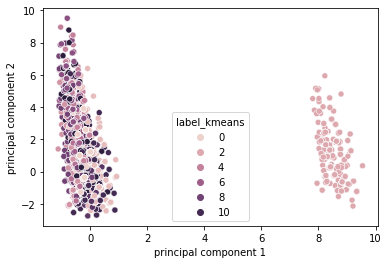

In [19]:
sns.scatterplot(x="principal component 1", y="principal component 2", hue=df_upper['label_kmeans'], data=principalDf)

### Lower

In [20]:
del df_lower['total']
df_lower = df_lower.iloc[: , 1:]
df_lower

,t_floral,t_stripe,t_dot,f_denim,f_leather,f_cotton,f_knit,f_pleated,s_fit,s_pencil,s_midi,s_mini,s_maxi,p_zipper
0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58958,0,0,0,1,0,0,0,0,0,0,0,0,0,0
58959,0,0,0,1,0,0,0,0,0,0,0,0,0,0
58960,0,0,0,1,0,0,0,0,0,0,0,0,0,0
58961,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
df_lower.to_csv("df_lower.csv")

In [22]:
## Feature Scaling
df_lower_standardscalar = StandardScaler.fit_transform(df_lower)
df_lower_standardscalar

array([[-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646],
       [-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646],
       [-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646],
       ...,
       [-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646],
       [-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646],
       [-0.27551452, -0.24624829, -0.14364258, ..., -0.23067647,
        -0.18630858, -0.17219646]])

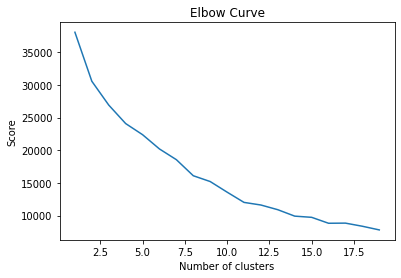

In [23]:
SSE = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=1500,n_init=10,random_state=0)
    kmeans.fit(df_lower)
    SSE.append(kmeans.inertia_)
plt.plot(range(1,20),SSE)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()

In [24]:
kmeans_lower = KMeans(n_clusters=12, random_state=42).fit(df_lower_standardscalar)
labels_lower = kmeans.labels_

In [25]:
df_lower['label_kmeans'] = labels_lower
df_lower

,t_floral,t_stripe,t_dot,f_denim,f_leather,f_cotton,f_knit,f_pleated,s_fit,s_pencil,s_midi,s_mini,s_maxi,p_zipper,label_kmeans
0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,11
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58958,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
58959,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
58960,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
58961,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [26]:
import pickle
filename = 'df_lower_kmeans.pkl'
pickle.dump(kmeans_lower, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

KMeans(n_clusters=12, random_state=42)

In [27]:
centers_lower = kmeans_lower.cluster_centers_

In [28]:
reduced_data_lower = PCA(n_components=2).fit_transform(df_lower_standardscalar)
principalDf_lower = pd.DataFrame(data = reduced_data_lower
             , columns = ['principal component 1', 'principal component 2'])
principalDf_lower

,principal component 1,principal component 2
0,1.812074,0.945045
1,-0.292021,-0.140454
2,-1.682842,-0.045119
3,0.911336,0.598295
4,-0.479485,0.693630
...,...,...
58958,-1.682842,-0.045119
58959,-1.682842,-0.045119
58960,-1.682842,-0.045119
58961,-0.292021,-0.140454


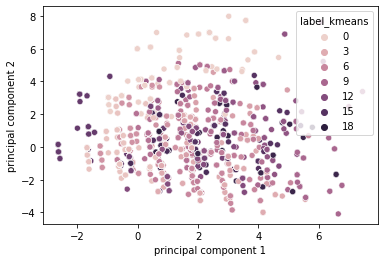

In [29]:
sns.scatterplot(x="principal component 1", y="principal component 2", hue=df_lower['label_kmeans'], data=principalDf_lower)

### Top bottom rating table
Mapped upper and lower items

In [30]:
downloadedRating = drive.CreateFile({'id':"10zqzA3-v8VfU37v7jxcaE4wbj-L0oRKg"})
downloadedRating.GetContentFile('rating.csv')

In [31]:
df_top_bottom_rating = pd.read_csv('rating.csv')
df_top_bottom_rating.head()

,Unnamed: 0,top,bottom,itemRating
0,0,8188,52013,4.0
1,1,9532,39863,5.0
2,2,2541,55868,1.0
3,3,25719,52417,4.0
4,4,25701,13091,5.0


In [32]:
for i, j in df_top_bottom_rating["top"].iteritems():
    df_top_bottom_rating["topClusterRating"]=df_upper["label_kmeans"]

In [33]:
for i, j in df_top_bottom_rating["bottom"].iteritems():
    df_top_bottom_rating["bottomClusterRating"]=df_lower["label_kmeans"]

## Cluster mapping

In [34]:
df_top_bottom_rating

,Unnamed: 0,top,bottom,itemRating,topClusterRating,bottomClusterRating
0,0,8188,52013,4.0,0,11
1,1,9532,39863,5.0,0,2
2,2,2541,55868,1.0,11,1
3,3,25719,52417,4.0,0,4
4,4,25701,13091,5.0,0,1
...,...,...,...,...,...,...
70,70,60532,5934,1.0,11,10
71,71,138258,55322,5.0,0,18
72,72,5850,53159,3.0,6,1
73,73,90409,58203,3.0,0,11


In [35]:
cluster_mapping=df_top_bottom_rating[["topClusterRating", "bottomClusterRating", "itemRating"]]
cluster_mapping

,topClusterRating,bottomClusterRating,itemRating
0,0,11,4.0
1,0,2,5.0
2,11,1,1.0
3,0,4,4.0
4,0,1,5.0
...,...,...,...
70,11,10,1.0
71,0,18,5.0
72,6,1,3.0
73,0,11,3.0


In [36]:
cluster_mapping_average=cluster_mapping.groupby(['topClusterRating','bottomClusterRating'])['itemRating'].mean().reset_index()
cluster_mapping_average=pd.DataFrame(cluster_mapping_average)
cluster_mapping_average.to_csv("cluster_mapping_average.csv")

## Collaborative Filtering

In [37]:
cluster_mapping_average=cluster_mapping.groupby(['topClusterRating','bottomClusterRating'])['itemRating'].mean().reset_index()
cluster_mapping_average=pd.DataFrame(cluster_mapping_average)
cluster_mapping_average

,topClusterRating,bottomClusterRating,itemRating
0,0,0,3.000000
1,0,1,3.466667
2,0,2,3.466667
3,0,4,4.000000
4,0,5,2.000000
5,0,8,5.000000
6,0,11,4.000000
7,0,12,2.000000
8,0,14,4.000000
9,0,18,2.500000


In [38]:
df_ratings = cluster_mapping_average.pivot(index='topClusterRating', columns='bottomClusterRating', values='itemRating')
df_ratings

bottomClusterRating,0,1,2,4,5,7,8,10,11,12,14,18
topClusterRating,,,,,,,,,,,,
0,3.0,3.466667,3.466667,4.0,2.0,NaN,5.0,NaN,4.0,2.0,4.0,2.5
3,NaN,2.000000,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,3.000000,3.000000,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,3.5
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
6,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
7,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,1.000000,2.500000,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN,2.5


In [39]:
df_ratings_clean = df_ratings.fillna(0)
df_ratings_clean.head()
df_ratings_clean.to_csv("df_ratings_clean.csv", index=False)

In [40]:
clothingVar = np.array(df_ratings_clean.var(axis=1))
print("Maximum Movie Varinance is :", max(clothingVar))
print("Minimum Movie Varinance is :", min(clothingVar))
clothingVar = clothingVar[~np.isnan(clothingVar)]

Maximum Movie Varinance is : 2.466961279461279
Minimum Movie Varinance is : 0.9924242424242422


In [41]:
print(clothingVar)

[2.46696128 0.99242424 2.3844697  1.33333333 1.36363636 1.33333333
 1.85606061]


More number of clothes are located in the first 3 clusters

## SVD

In [55]:
df_ratings_clean.T.corr()

topClusterRating,0,3,4,5,6,7,11
topClusterRating,,,,,,,
0,1.000000,-0.406540,0.252019,-0.057366,-0.015696,0.136452,0.158727
3,-0.406540,1.000000,0.046785,-0.131716,0.273513,0.500520,-0.173039
4,0.252019,0.046785,1.000000,0.501352,0.138642,0.399382,0.855259
5,-0.057366,-0.131716,0.501352,1.000000,-0.134840,-0.090909,0.365994
6,-0.015696,0.273513,0.138642,-0.134840,1.000000,0.674200,-0.142857
7,0.136452,0.500520,0.399382,-0.090909,0.674200,1.000000,0.019263
11,0.158727,-0.173039,0.855259,0.365994,-0.142857,0.019263,1.000000


In [61]:
cluster_corr_mat = df_ratings_clean.T.corr()
corr_cluster_1 = cluster_corr_mat.iloc[0]

In [62]:
corr_cluster_1.sort_values(ascending=False, inplace=True)

In [63]:
corr_cluster_1

topClusterRating
0     1.000000
4     0.252019
11    0.158727
7     0.136452
6    -0.015696
5    -0.057366
3    -0.406540
Name: 0, dtype: float64

In [66]:
## predicted cluster rating
clustervalue=0
cluster_mapping_average[ cluster_mapping_average['topClusterRating'] == clustervalue]


,topClusterRating,bottomClusterRating,itemRating
0,0,0,3.000000
1,0,1,3.466667
2,0,2,3.466667
3,0,4,4.000000
4,0,5,2.000000
5,0,8,5.000000
6,0,11,4.000000
7,0,12,2.000000
8,0,14,4.000000
9,0,18,2.500000


In [75]:
def cluster_cluster_CF(reviews):
    """
    Obtains the RMSE error in the user-user collaborative 
    filtering algorithms using all the similar users.
    
    :param: reviews (numpy.ndarray) : The dense user-item matrix.
    
    :returns: RMSE of predictions
    :rvalue: float
    """
    
    # Get the user-user similarity matrix
    user_user_similarity = cosine_similarity(reviews)
    
    sqdiffs = 0
    num_preds = 0

    # to protect against divide by zero issues
    eps = 1e-6

    cnt_no_sims = 0
    # loop over the users
    for user_i, u in enumerate(reviews):
        
        # products user HAS rated
        i_rated = np.where(u>0)[0]
    
        # Get the average rating for this user
        user_avg =  i_rated.mean()
        
        # loop over all the products that each user reviewed
        # Note: these are all the non-zero entries in the row
        for i_product in i_rated:
        
            # Get all the users (indices) that
            # have also reviewed this product.
            # Note: This also includes the user of interest!
            i_has_rated = np.where(reviews[:, i_product])[0]
        
            # remove the user (indices) of interest 
            # from this column
            i_remove = np.argmin(abs(i_has_rated - user_i))
            i_others_have_rated = np.delete(i_has_rated, i_remove)
        
            # Get the ratings for product by the similar users,
            ratings = reviews[i_others_have_rated, 
                              i_product]
                    
            ratings -= user_avg
               
            # get the cosine similarity between the users
            # and other users.
            similarities = user_user_similarity[user_i,
                                                i_others_have_rated]
            
            # denominator of user_i's produdct prediction
            norm = np.sum(similarities)
            if norm==0:
                cnt_no_sims += 1
                norm = eps
            
            # prediction of user u on product i: p_{u,i}
            predicted_rating = user_avg + np.sum(np.multiply(
                                            ratings.T,
                                            similarities))/norm
            
            # actual rating by user u on product i
            actual_rating = reviews[user_i, i_product]
            
        # get the L2 difference in predicted and actual
        # rating for the user
        sqdiffs += pow(predicted_rating - actual_rating, 2.0)
        num_preds+=1
    
    # get the average of all the predictions
    rmse_cossim = np.sqrt(sqdiffs/num_preds)
    return rmse_cossim

In [76]:
from scipy.sparse import csc_matrix
ratings_matrix=csc_matrix(df_ratings_clean)
ratings_matrix = ratings_matrix.toarray()


In [85]:
sparsity = float(len(ratings_matrix.nonzero()[0]))
sparsity /= (ratings_matrix.shape[0] * ratings_matrix.shape[1])
sparsity *= 100
print("Sparsity: {:4.2f}%".format(sparsity))

Sparsity: 29.76%


In [89]:
mean_rating = cluster_mapping_average['itemRating'].mean()
base_rmse = np.sqrt(pow(cluster_mapping_average['itemRating']-mean_rating, 2).mean())
print("RMSE = {}".format(base_rmse))

RMSE = 0.9465877901412233


In [77]:
user_all_rmse = cluster_cluster_CF(ratings_matrix)
print(user_all_rmse)

0.8777907591380976


In [78]:
def User_User_CF_TopN(reviews, N):
    """
    Obtains the RMSE error in the user-user collaborative 
    filtering algorithms using the top N most similar users.
    
    :param: reviews (numpy.ndarray) : The dense user-item matrix.
    :param: N (int) : The number of the most similar users.
    
    :returns: RMSE of predictions
    :rvalue: float
    """
    
    # Get the user-user similarity matrix
    user_user_similarity = cosine_similarity(reviews)
 
    sqdiffs = 0
    num_preds = 0

    # to protect against divide by zero issues
    eps = 1e-6

    cnt_no_sims = 0
    # loop over the users
    for user_i, u in enumerate(reviews):
        
        # products user HAS rated
        i_rated = np.where(u>0)[0]
    
        # Get the average rating for this user
        user_avg = i_rated.mean()
        
        # loop over all the products that each user reviewed
        # Note: these are all the non-zero entries in the row
        for i_product in i_rated:
        
            # Get all the users (indices) that
            # have also reviewed this product.
            # Note: This also includes the user of interest!
            i_has_rated = np.where(reviews[:, i_product]>0)[0]
        
            # remove the user (indices) of interest 
            # from this column
            i_remove = np.argmin(abs(i_has_rated - user_i))
            i_others_have_rated = np.delete(i_has_rated, i_remove)
        
            # Get the ratings for product by the similar users,
            ratings = reviews[i_others_have_rated, 
                              i_product]
                    
            ratings -= user_avg
               
            # get the cosine similarity between the users
            # and other users.
            sims = user_user_similarity[user_i,
                                        i_others_have_rated]
            
            #choose top N most similar users
            most_similar_users = sims[np.argsort(sims*-1)][:N]
            most_similar_ratings = ratings[np.argsort(sims*-1)][:N]
            
            # denominator of user_i's produdct prediction
            norm = np.sum(most_similar_users)
            if norm==0:
                cnt_no_sims += 1
                norm = eps
            
            # prediction of user u on product i: p_{u,i}
            predicted_rating = user_avg + np.sum(np.multiply(
                                            most_similar_ratings.T,
                                            most_similar_users))/norm
            
            # actual rating by user u on product i
            actual_rating = reviews[user_i, i_product]
        
        # get the L2 difference in predicted and actual
        # rating for the user
        sqdiffs += pow(predicted_rating - actual_rating, 2.0)
        num_preds+=1
    
    # get the average of all the predictions
    rmse_cossim = np.sqrt(sqdiffs/num_preds)
    return rmse_cossim

In [80]:
cluster_mapping_average["topClusterRating"].unique()

array([ 0,  3,  4,  5,  6,  7, 11])

In [82]:
N_clusters = [0,  3,  4,  5,  6,  7, 11]
top_N   = [User_User_CF_TopN(ratings_matrix, i) for i in N_clusters]

In [83]:
top_N

[3.4908042462610656,
 0.87233226753302,
 0.8470961144633928,
 0.8777907591380976,
 0.8777907591380976,
 0.8777907591380976,
 0.8777907591380976]

Text(0.5, 1.0, 'RMSE Error In Recommender Predictions')

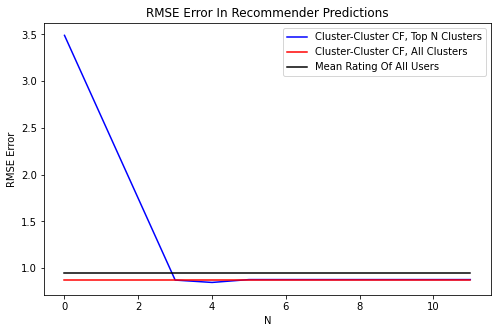

In [92]:
# make constant vectors
user_all = []
mean_all = []
for i in range(len(N_clusters)):
    user_all.append(user_all_rmse)
    mean_all.append(base_rmse)

plt.figure(figsize=(8,5))
plt.plot(N_clusters, top_N,    'b', label = 'Cluster-Cluster CF, Top N Clusters')
plt.plot(N_clusters, user_all, 'r', label = 'Cluster-Cluster CF, All Clusters')
plt.plot(N_clusters, mean_all, 'k', label = 'Mean Rating Of All Users')
plt.xlabel('N')
plt.ylabel('RMSE Error')
plt.legend()
plt.title('RMSE Error In Recommender Predictions')

We can see that after 4 clusters the predictive power of collabortive filtering falls down. So narrowing it down to 4 clusters